# Lab assignment: fraud detection through ensemble methods

<img src="img/fraud.jpg" style="width:600px;">

In this assignment we will use all the skills in ensemble learning we acquire from previous exercises to build a an automated fraud detection system.

## Guidelines

Throughout this notebook you will find empty cells that you will need to fill with your own code. Follow the instructions in the notebook and pay special attention to the following symbols.

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>You will need to solve a question by writing your own code or answer in the cell immediately below, or in a different file as instructed. Both correctness of the solution and code quality will be taken into account for marking.</td></tr>
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>This is a hint or useful observation that can help you solve this assignment. You are not expected to write any solution, but you should pay attention to them to understand the assignment.</td></tr>
 <tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td>This is an advanced and voluntary excersize that can help you gain a deeper knowledge into the topic. This exercise won't be taken into account towards marking, but you are encouraged to undertake it. Good luck!</td></tr>
</table>

During the assigment you will make use of several Python packages that might not be installed in your machine. If that is the case, you can install new Python packages with

    conda install PACKAGENAME
    
if you are using Python Anaconda. Else you should use

    pip install PACKAGENAME

The following code will embed any plots into the notebook instead of generating a new window:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

Lastly, if you need any help on the usage of a Python function you can place the writing cursor over its name and press Caps+Shift to produce a pop-out with related documentation. This will only work inside code cells. 

Let's go!

## Data loading

The data for this problem is included in the *data* folder, with separate files for training and test data. Each file includes several unidentified explanatory features, together with an "Amount" feature and the target "Class". Fraudulent operations are marked as Class == 1.

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Load the training and test data into Pandas DataFrames with names *train* and *test*, respectively.
 </td></tr>
</table>

In [2]:
####### INSERT YOUR CODE HERE
data_train = pd.read_csv('data/fraud_train.csv')
data_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [3]:
data_test = pd.read_csv('data/fraud_test.csv')

In [4]:
print(data_train.shape)
print(data_test.shape)

(5246, 30)
(5246, 30)


In [5]:
data_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000,...,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000
mean,-0.539993,0.182329,0.302563,0.308565,-0.470484,-0.037538,-0.397722,0.131348,-0.212005,-0.269800,...,0.010017,-0.132105,-0.051927,0.010908,0.133937,0.019680,0.023637,-0.001524,93.582991,0.046893
std,2.700370,2.111652,2.698561,1.715353,2.036673,1.411958,2.273415,2.027100,1.322918,1.863553,...,1.154418,0.696071,0.748970,0.583605,0.470548,0.491799,0.460188,0.350230,250.696936,0.211430
min,-34.591213,-44.639245,-31.103685,-5.519697,-32.092129,-21.248752,-21.922811,-37.353443,-9.283925,-18.271168,...,-12.815353,-8.887017,-26.751119,-2.185457,-7.495741,-1.345640,-7.144717,-8.364853,0.000000,0.000000
25%,-1.160978,-0.556885,0.070103,-0.719923,-0.999000,-0.734639,-0.673759,-0.137595,-0.803361,-0.566849,...,-0.227437,-0.549349,-0.178857,-0.332102,-0.136150,-0.328017,-0.061094,-0.007941,5.102500,0.000000
50%,-0.341215,0.142323,0.692239,0.214909,-0.360585,-0.226545,-0.100690,0.079762,-0.173325,-0.116838,...,-0.053649,-0.103794,-0.045147,0.068361,0.168982,-0.080875,0.015344,0.023243,22.190000,0.000000
75%,1.157161,0.867764,1.357493,1.089141,0.211143,0.400486,0.395594,0.401846,0.454970,0.422938,...,0.126478,0.299756,0.087792,0.402059,0.434307,0.289032,0.102887,0.083911,81.665000,0.000000
max,1.618082,16.713389,3.971381,11.927512,31.457046,21.393069,34.303177,20.007208,7.938980,11.519106,...,27.202839,4.534454,5.303607,3.979637,2.208209,2.964300,4.444505,5.414028,7712.430000,1.000000


Let`s see the NA'S

In [6]:
print(data_train.isnull().any().sum(), ' / ', len(data_train.columns))

print(data_train.isnull().any(axis=1).sum(), ' / ', len(data_train))

0  /  30
0  /  5246


There is not NA's in our data

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Analyze the training data. How many explanatory variables do you have? What is the distribution of classes?
 </td></tr>
</table>

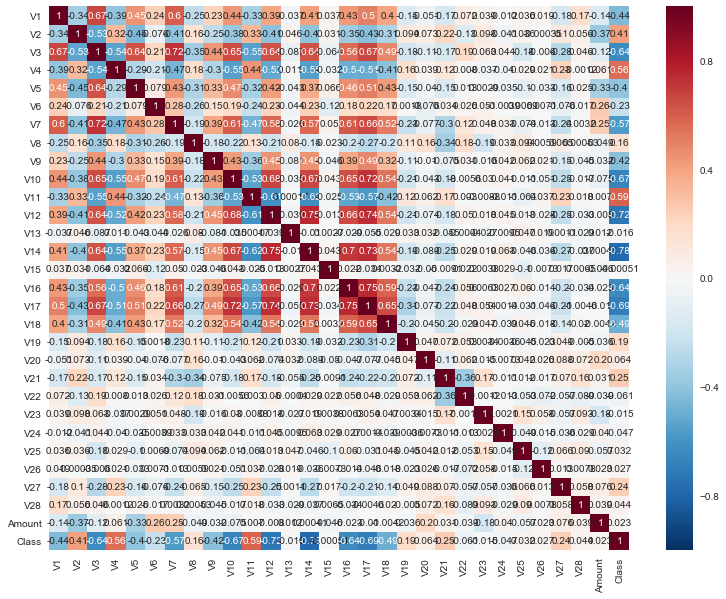

In [7]:
####### INSERT YOUR CODE HERE
import seaborn as sn
plt.subplots(figsize=(13, 10))
sns.heatmap(data_train.corr(),  linecolor='k', annot=True)

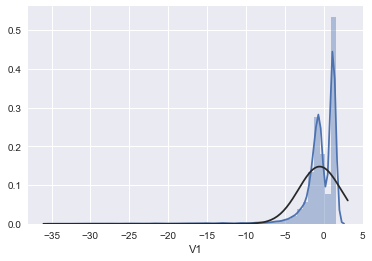

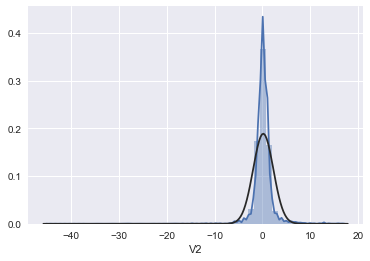

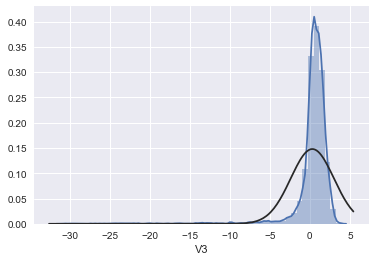

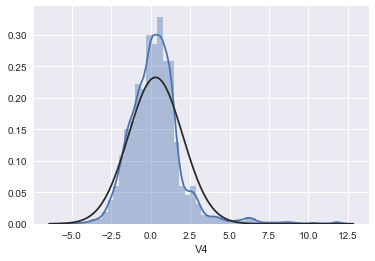

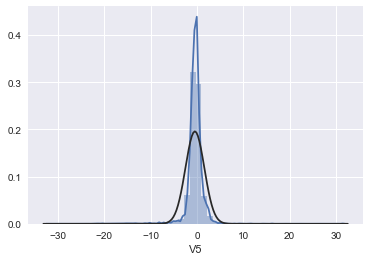

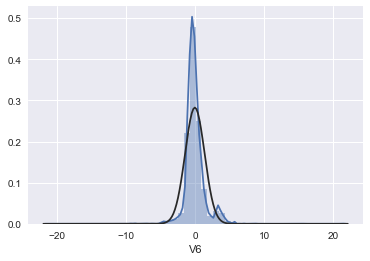

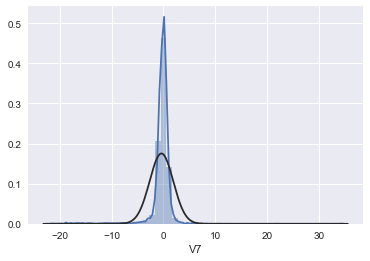

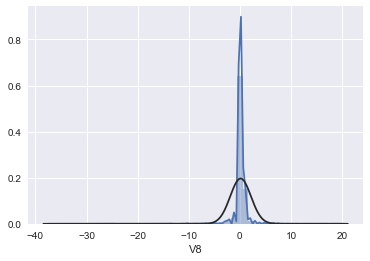

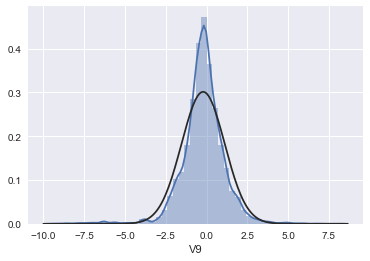

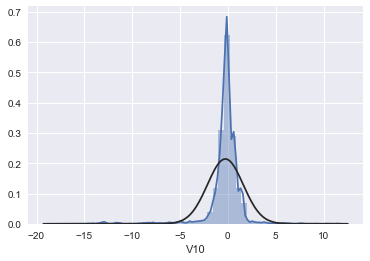

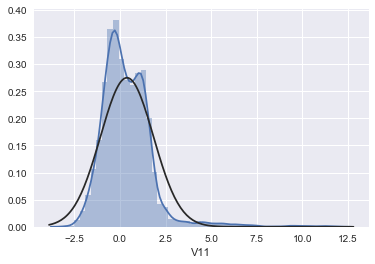

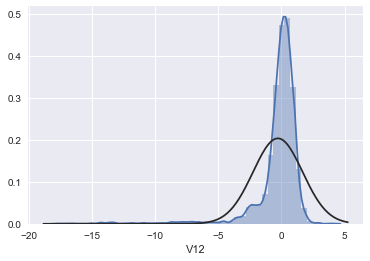

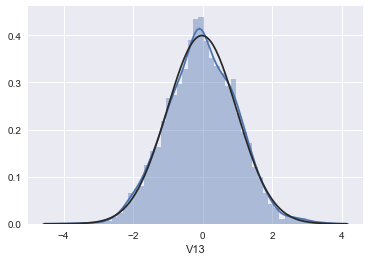

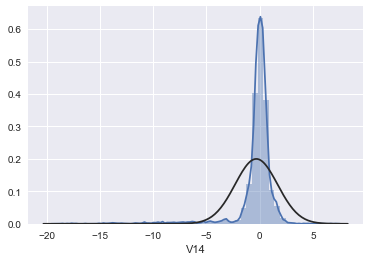

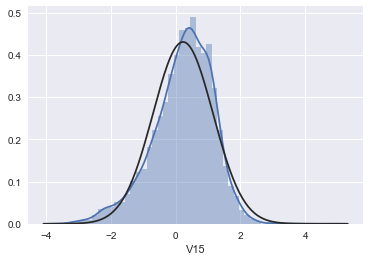

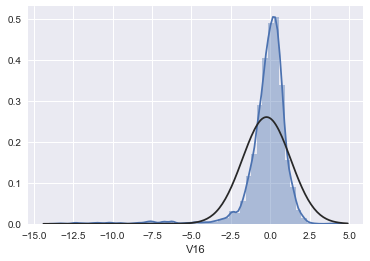

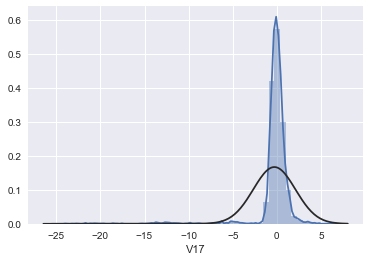

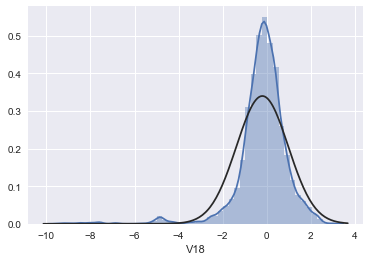

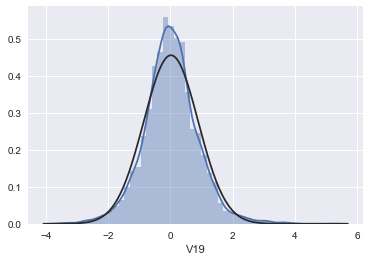

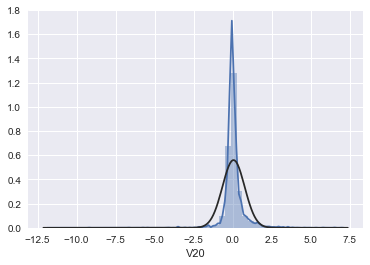

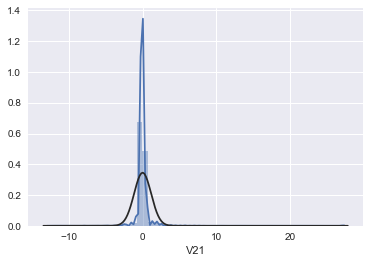

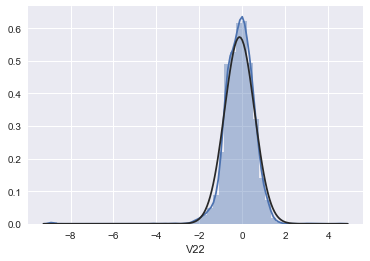

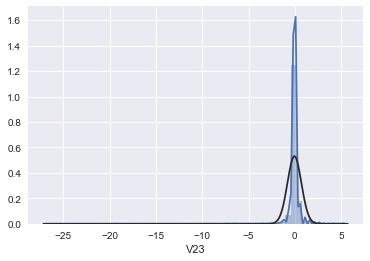

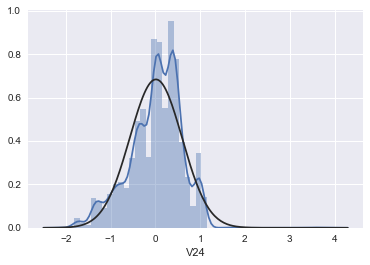

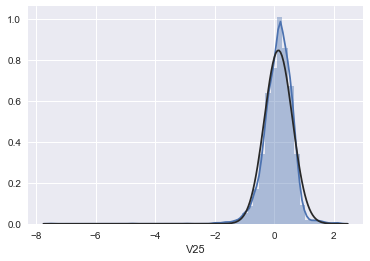

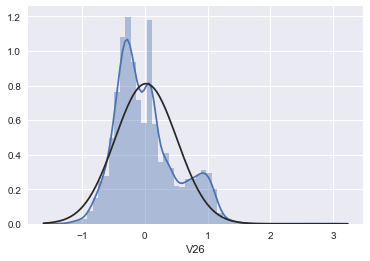

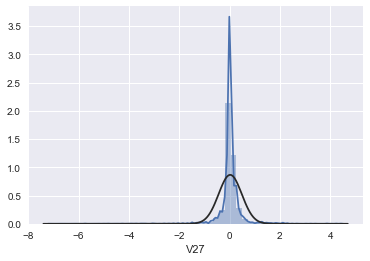

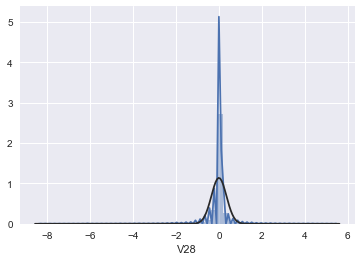

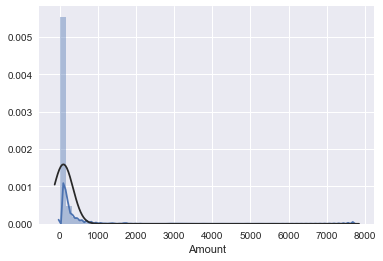

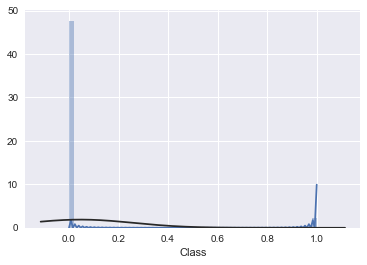

In [8]:
from scipy import stats
for var in data_train.columns:
    sns.distplot((data_train[var]),fit=stats.norm)
    plt.show()

In [9]:
data_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [10]:
sum(data_train.Class == 0)

5000

In [11]:
sum(data_train.Class == 1)

246

The Class Distribution:

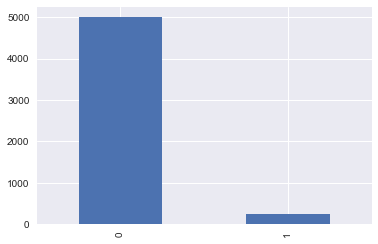

In [12]:
data_train.Class.value_counts().plot(kind = 'bar')

Our objective variable is totally unbalanced

In [13]:
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(data_train[data_train.columns.difference(['Class'])])

In [14]:
print( PCA(n_components=2).fit(data_train[data_train.columns.difference(['Class'])]).explained_variance_ratio_)

[  9.98938542e-01   5.23627006e-04]


as we can see out PCA has the 99% of the data information so we can use the 2 princial component

## Unsupervised fraud detector

Fraudulent activities are usually prosecuted, therefore fraudsters need to be creative and come up constantly with new ways of performing fraud. Furthermore, frauds are scarce (fortunately), and so we have few positive class patterns available for training. Because of these facts, it might make sense to build an unsupervised fraud detector.

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Using **only the training data**, create an anomaly detection model. You should also choose an error metric adequate for the problem, and tune the model parameters in order to optimize this error.
 </td></tr>
</table>

In [15]:
####### INSERT YOUR CODE HERE
from sklearn.ensemble import IsolationForest
classifier = IsolationForest(n_estimators=100, max_samples=200)

In [16]:
####Stratified Fold
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
folds = list(skf.split(data_train[data_train.columns.difference(['Class'])], data_train.Class))

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer, roc_auc_score

In [18]:
data_train.Class[data_train.Class==1] = -1
data_train.Class[data_train.Class==0] = 1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
ps = {"contamination": np.linspace(0.0, 0.5,  15),
      "n_estimators": [100, 2000]
     }
f1sc = make_scorer(f1_score)
IF =  IsolationForest(random_state=30)
search = GridSearchCV(estimator=IF, param_grid=ps, scoring=f1sc,  cv=folds, n_jobs=-1)
search.fit(reduced_data, data_train.Class)

GridSearchCV(cv=[(array([  50,   51, ..., 5244, 5245]), array([   0,    1, ..., 1244, 1245])), (array([   0,    1, ..., 5244, 5245]), array([  50,   51, ..., 2244, 2245])), (array([   0,    1, ..., 5244, 5245]), array([  99,  100, ..., 3244, 3245])), (array([   0,    1, ..., 5244, 5245]), array([ 148,  149, ..., 4244, 4245])), (array([   0,    1, ..., 4244, 4245]), array([ 197,  198, ..., 5244, 5245]))],
       error_score='raise',
       estimator=IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=30,
        verbose=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'contamination': array([ 0.     ,  0.03571,  0.07143,  0.10714,  0.14286,  0.17857,
        0.21429,  0.25   ,  0.28571,  0.32143,  0.35714,  0.39286,
        0.42857,  0.46429,  0.5    ]), 'n_estimators': [100, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1

In [20]:
search.best_estimator_

IsolationForest(bootstrap=False, contamination=0.035714285714285712,
        max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=1,
        random_state=30, verbose=0)

In [21]:
classifier = search.best_estimator_
classifier.fit(reduced_data)
pred = classifier.predict(reduced_data)

In [22]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,auc,f1_score\
    ,fbeta_score,classification_report,confusion_matrix,precision_recall_curve,roc_auc_score\
    ,roc_curve
f1_score(data_train.Class, pred)
print(classification_report(pred, data_train.Class))
print(confusion_matrix(pred, data_train.Class))

             precision    recall  f1-score   support

         -1       0.57      0.74      0.64       188
          1       0.99      0.98      0.98      5058

avg / total       0.97      0.97      0.97      5246

[[ 139   49]
 [ 107 4951]]


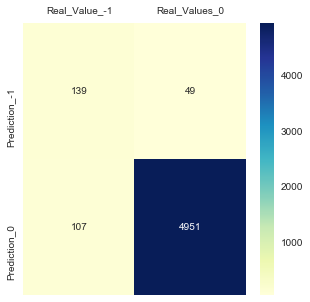

In [23]:
df_cm = confusion_matrix(pred, data_train.Class)
f, ax= plt.subplots(figsize = (5, 5))
cols = ['Real_Value_-1','Real_Values_0'] 
rows = ['Prediction_-1','Prediction_0'] 
df_cm = pd.DataFrame(df_cm, columns = [i for i in cols], index = [i for i in rows])
sns.heatmap(df_cm, annot=True, ax=ax, fmt='d', cmap="YlGnBu") 
ax.xaxis.set_ticks_position('top') 


<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Create a visualization showing the performance of this model over the test data.
 </td></tr>
</table>

(2500, 2)


(-10, 1500)

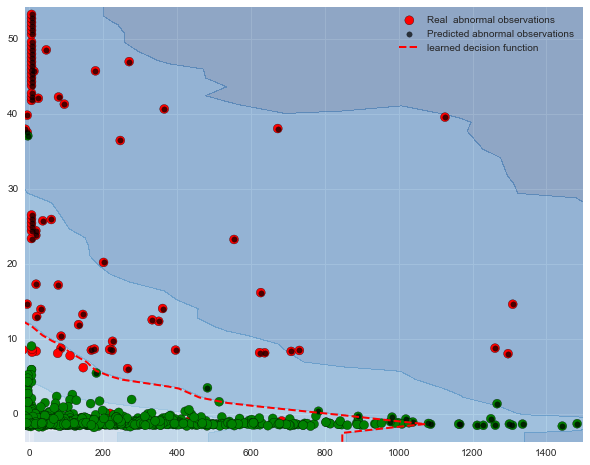

In [24]:
x_min, x_max = reduced_data[:, 0].min()-1 , reduced_data[:, 0].max()+1
y_min, y_max = reduced_data[:, 1].min()-1, reduced_data[:, 1].max() +1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
outlier_frac=0.035714285714285712
threshold = stats.scoreatpercentile(classifier.decision_function(reduced_data), 100*outlier_frac)
f, axarr = plt.subplots( figsize=(10, 8))
print(np.c_[xx.ravel(), yy.ravel()].shape)
Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
color= ['red' if l == -1 else 'green' for l in data_train.Class]
p1= axarr.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Blues_r)
p2= axarr.scatter(reduced_data[:, 0], reduced_data[:, 1],  s=80, edgecolor='k', c=color)
a = axarr.contour(xx, yy, Z, levels=[threshold],
                            linewidths=2, colors='red')

p3= axarr.scatter(reduced_data[pred == -1, 0], reduced_data[pred==-1, 1],  s=30, edgecolor='k', c="black", alpha=0.7)
plt.legend([ p2, p3,a.collections[0]],
           ["Real  abnormal observations",
            "Predicted abnormal observations", "learned decision function"],
           loc="upper right")
plt.xlim(-10,1500)

We observe that our model mark as *Fraud* all the point above the red dashed line

Our unsupervised clasificator miss predictions (on train Data) as we can see at the Decision function Contours 

In [25]:
from sklearn.metrics import roc_auc_score
f1_score(data_train.Class, pred)

0.98448995824219521

In order to predict on test data we need to make to PCA transformation too

In [26]:
reduced_test = PCA(n_components=2).fit_transform(data_test[data_test.columns.difference(['Class'])])
print( PCA(n_components=2).fit(data_test[data_test.columns.difference(['Class'])]).explained_variance_ratio_)

[  9.98784942e-01   5.02617754e-04]


In [27]:
np.unique(data_train.Class, return_counts=True)

(array([-1,  1], dtype=int64), array([ 246, 5000], dtype=int64))

In [28]:
data_test.Class[data_test.Class==1] = -1
data_test.Class[data_test.Class==0] =1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
np.unique(data_test.Class, return_counts=True)

(array([-1,  1], dtype=int64), array([ 246, 5000], dtype=int64))

In [30]:
pred_test = classifier.predict(reduced_test)


In [31]:
#f1_score(data_test.Class, pred_test)
print(classification_report(pred_test, data_test.Class))
print(confusion_matrix(pred_test, data_test.Class))

             precision    recall  f1-score   support

         -1       0.52      0.72      0.61       177
          1       0.99      0.98      0.98      5069

avg / total       0.97      0.97      0.97      5246

[[ 128   49]
 [ 118 4951]]


In [32]:
df_cm = confusion_matrix(pred_test, data_test.Class)
df_cm

array([[ 128,   49],
       [ 118, 4951]], dtype=int64)

The Confussion Matrix:

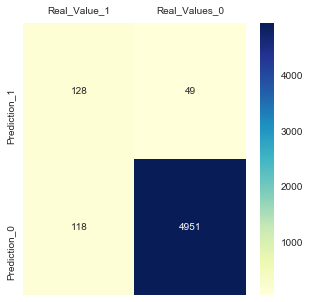

In [33]:
f, ax= plt.subplots(figsize = (5, 5))
cols = ['Real_Value_1','Real_Values_0'] 
rows = ['Prediction_1','Prediction_0'] 
df_cm = pd.DataFrame(df_cm, columns = [i for i in cols], index = [i for i in rows])
sns.heatmap(df_cm, annot=True, ax=ax, fmt='d', cmap="YlGnBu") 
ax.xaxis.set_ticks_position('top') 

In [34]:
pred_test =  classifier.decision_function(reduced_test)
fpr1, tpr1, thresholds = roc_curve(data_test.Class,pred_test)
roc_auc1 = auc(fpr1,tpr1)

Our Model only can predict about 43% (108 out of 246) of the fraud, let's see if we can do better

## Supervised model

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Let's check now whether we can improve the results using a supervised model, that is, a model that exploits the Class information available in the training data. Build an ensemble-based classification model that performs the best as possible, **using only the data in the training set**.
 </td></tr>
</table>

In [35]:
####### INSERT YOUR CODE HERE
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

Change the values of Label

In [36]:
data_train.Class[data_train.Class==1] = 0
data_train.Class[data_train.Class==-1] = 1
data_test.Class[data_test.Class==1] = 0
data_test.Class[data_test.Class==-1] = 1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4:

First let's  balanced the data with SMOTE

In [37]:
sm = SMOTE(random_state=12, )
x_train_res, y_train_res = sm.fit_sample(data_train[data_train.columns.difference(['Class'])], data_train.Class)

In [38]:
reduced_data = PCA(n_components=2).fit_transform(x_train_res)
print( PCA(n_components=2).fit(x_train_res).explained_variance_ratio_)

[ 0.99459718  0.00379029]


In [39]:
f1sc = make_scorer(f1_score)
ps = {  'n_estimators': [200, 700],
                'max_features': ['auto', 'sqrt', 'log2'],
                "max_depth": [3, None,10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
rf = RandomForestClassifier(random_state=30, n_jobs=-1)
search = RandomizedSearchCV(estimator=rf, param_distributions=ps, scoring=f1sc, cv=3)
search.fit(x_train_res, y_train_res)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=30, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [200, 700], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [3, None, 10], 'min_samples_split': [2, 3, 10], 'min_samples_leaf': [1, 3, 10], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=make_scorer(f1_score),
          verbose=0)

In [40]:
search.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=-1,
            oob_score=False, random_state=30, verbose=0, warm_start=False)

In [41]:
classifier = search.best_estimator_
classifier.fit(data_train[data_train.columns.difference(['Class'])], data_train.Class)
pred_test= classifier.predict(data_test[data_test.columns.difference(['Class'])])

In [42]:
np.unique(data_test.Class)

array([0, 1], dtype=int64)

In [43]:
print(classification_report(pred_test, data_test.Class))
print(confusion_matrix(pred_test, data_test.Class))

             precision    recall  f1-score   support

          0       1.00      0.99      1.00      5041
          1       0.83      1.00      0.91       205

avg / total       0.99      0.99      0.99      5246

[[5000   41]
 [   0  205]]


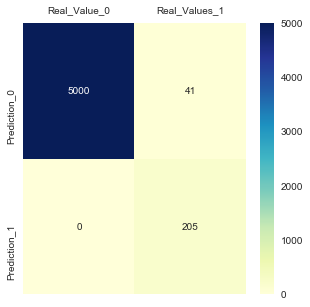

In [44]:
df_cm = confusion_matrix(pred_test, data_test.Class)
f, ax= plt.subplots(figsize = (5, 5))
cols = ['Real_Value_0','Real_Values_1'] 
rows = ['Prediction_0','Prediction_1'] 
df_cm = pd.DataFrame(df_cm, columns = [i for i in cols], index = [i for i in rows])
sns.heatmap(df_cm, annot=True, ax=ax, fmt='d', cmap="YlGnBu") 
ax.xaxis.set_ticks_position('top') 

Now we will build XGBoost Model

In [45]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier( random_state=30, n_jobs=-1)
parameters = {'objective':['binary:logistic'],
              'learning_rate': [0.05, 0.01, 0.1, 0.5, 0.55], 
              'max_depth': [6, 10, 5],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7, 0.5, 0.6],
              'n_estimators': [250, 700], 
             }


clf = RandomizedSearchCV(xgb_model,
                   cv=5,  param_distributions=parameters,
                   scoring=f1sc)

clf.fit(x_train_res, y_train_res)


#best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=30, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'objective': ['binary:logistic'], 'learning_rate': [0.05, 0.01, 0.1, 0.5, 0.55], 'max_depth': [6, 10, 5], 'min_child_weight': [11], 'silent': [1], 'subsample': [0.8], 'colsample_bytree': [0.7, 0.5, 0.6], 'n_estimators': [250, 700]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=make_scorer(f1_score),
          verbose=0)

In [46]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=11, missing=None, n_estimators=700,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=30, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=1, subsample=0.8)

In [47]:
classifier =clf.best_estimator_
classifier.fit(x_train_res, y_train_res)
Mtest = np.matrix(data_test[data_test.columns.difference(['Class'])])
pred_test= classifier.predict(Mtest)

In [48]:

print(classification_report(pred_test, data_test.Class))
print(confusion_matrix(pred_test, data_test.Class))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      4978
          1       0.86      0.79      0.82       268

avg / total       0.98      0.98      0.98      5246

[[4944   34]
 [  56  212]]


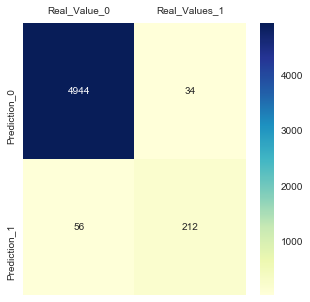

In [49]:
df_cm = confusion_matrix(pred_test, data_test.Class)
f, ax= plt.subplots(figsize = (5, 5))
cols = ['Real_Value_0','Real_Values_1'] 
rows = ['Prediction_0','Prediction_1'] 
df_cm = pd.DataFrame(df_cm, columns = [i for i in cols], index = [i for i in rows])
sns.heatmap(df_cm, annot=True, ax=ax, fmt='d', cmap="YlGnBu") 
ax.xaxis.set_ticks_position('top') 

Finally we will build a Voting Clasifier with 3 models: a Random Forest, an XGBoost and a SVM, and 

In [50]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
class_rf= search.best_estimator_
class_xgb = clf.best_estimator_
class_svm = SVC(kernel='rbf', probability=True, random_state=30)
class_voting = VotingClassifier(estimators=[('rf', class_rf), ('xgb', class_xgb),
                                    ('svc', class_svm)],
                        voting='soft', weights=[1, 2, 2], n_jobs = -1)

In [51]:
class_voting.fit(x_train_res, y_train_res)

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_w...bf',
  max_iter=-1, probability=True, random_state=30, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=-1, voting='soft',
         weights=[1, 2, 2])

In [61]:
pred_test= class_voting.predict(Mtest)

In [53]:
print(classification_report(pred_test, data_test.Class))
print(confusion_matrix(pred_test, data_test.Class))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99      5014
          1       0.86      0.91      0.88       232

avg / total       0.99      0.99      0.99      5246

[[4979   35]
 [  21  211]]


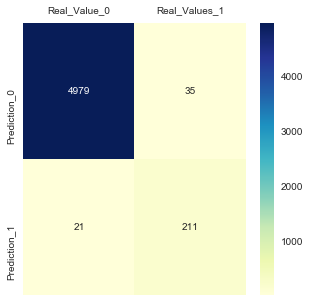

In [62]:
df_cm = confusion_matrix(pred_test, data_test.Class)
f, ax= plt.subplots(figsize = (5, 5))
cols = ['Real_Value_0','Real_Values_1'] 
rows = ['Prediction_0','Prediction_1'] 
df_cm = pd.DataFrame(df_cm, columns = [i for i in cols], index = [i for i in rows])
sns.heatmap(df_cm, annot=True, ax=ax, fmt='d', cmap="YlGnBu") 
ax.xaxis.set_ticks_position('top') 

We make an 86% of precision on Fraud cases (211 out of 246) 

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Now create a visualization showing the performance of this supervised model on the test set, together with the unsupervised model. Has the performance improved after making use of the Class data?
 </td></tr>
</table>

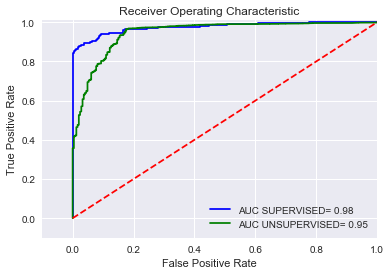

In [60]:
####### INSERT YOUR CODE HERE
pred_testf = classifier.predict_proba(Mtest)[:, 1]
fpr, tpr, thresholds = roc_curve(data_test.Class,pred_testf)
roc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC SUPERVISED= %0.2f'% roc_auc)
plt.plot(fpr1, tpr1, 'green',label='AUC UNSUPERVISED= %0.2f'% roc_auc1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

And the confusion Matrix on Test Data

             precision    recall  f1-score   support

          0       1.00      0.99      0.99      5014
          1       0.86      0.91      0.88       232

avg / total       0.99      0.99      0.99      5246



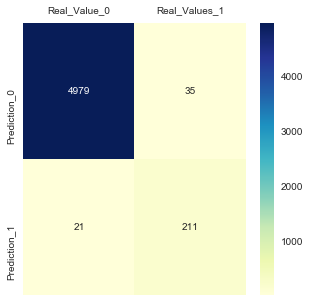

In [65]:
df_cm = confusion_matrix(pred_test, data_test.Class)
f, ax= plt.subplots(figsize = (5, 5))
cols = ['Real_Value_0','Real_Values_1'] 
rows = ['Prediction_0','Prediction_1'] 
df_cm = pd.DataFrame(df_cm, columns = [i for i in cols], index = [i for i in rows])
sns.heatmap(df_cm, annot=True, ax=ax, fmt='d', cmap="YlGnBu") 
ax.xaxis.set_ticks_position('top') 
print(classification_report(pred_test, data_test.Class))

Clearly the Model was improved when we use the Class Data, the supervised model has better Precision and Recall (0.86, 0.91) on true positives (fraud cases) than the Unsupervised one (0.52 and 0.72 respectively). 